In [87]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from yahoo_fin import stock_info as si
from matplotlib import pyplot as plt
from plotly import express as px

In [96]:
# api = NewsApiClient(api_key = "fc42c395e2bd4701b69c6ed1659887c8")

In [65]:
starbucks = si.get_data("sbux")
starbucks = starbucks.loc["2021-01-04":] # we want to start in 2021 (ideally)
starbucks["date"] = starbucks.index
starbucks = starbucks.reset_index()
starbucks.drop(columns = "index", inplace = True)

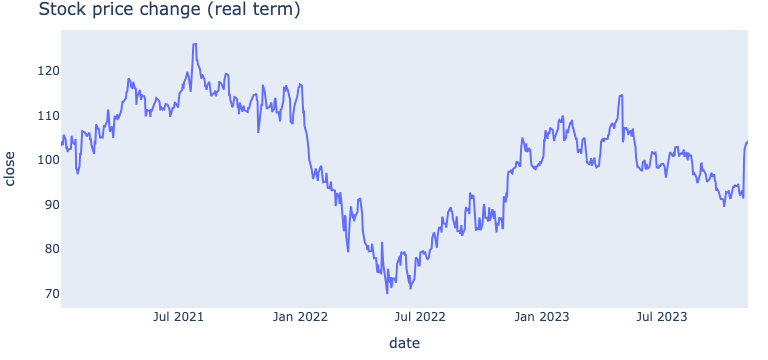

In [80]:
# we will focus on close price

fig = px.line(starbucks, 
              x = "date",
              y = "close",
              hover_data = ["close"],
              title = "Stock price change (real term)")

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20))
fig.show()

In [88]:
# calculate the percentage change 
# price_tomorrow - price_today / price today

starbucks["tomorrow"] = starbucks["close"].shift(1)
starbucks = starbucks.fillna(starbucks["close"][0])
starbucks["%change"] = (starbucks["tomorrow"] - starbucks["close"]) / starbucks["close"]
avg = np.mean(starbucks["%change"])

0.0001388153388901682

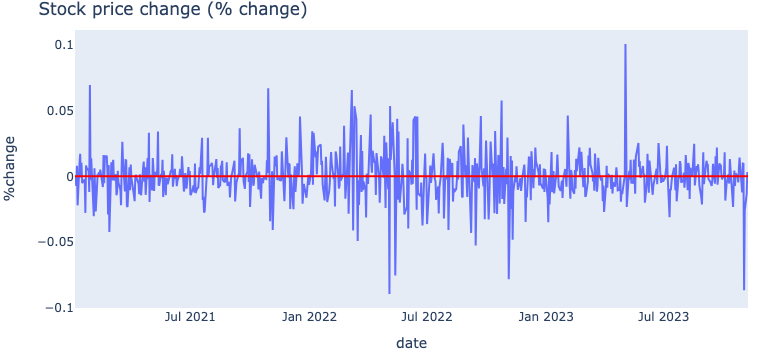

In [95]:
fig = px.line(starbucks, 
              x = "date",
              y = "%change",
              hover_data = ["close", "%change"],
              title = "Stock price change (% change)")

fig.add_hline(y = avg,
              line_color = "red")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20))
fig.show()